# Python 🐍 Basistechnieken in de Natuurkunde

### Dmitry Kouznetsov, imec/KULeuven
<br>
<div >
    <img style="display: block; margin-left: auto; margin-right: auto; width: 70%;" src="https://files.realpython.com/media/Introduction-to-Jupyter-Notebooks_Watermarked.16bb2cf21ca5.jpg">
</div>

# Wat gaan we doen vandaag?

De opdrachten (🎉) in deze notebook zijn enkel bedoeld om bepaalde concepten te oefenen en moet je niet afgeven. Enkel de taak die in het tweede deel van de sessie wordt uitgelegd staat op punten.

1. **Python**

    a. Starterkit voor Pythonistas
    
    b. Mindset bij het programmeren
    
    c. Plotten voor dummies
    
    
2. **Fitten met LS-methode**

    a. Theorie
    
    b. Voorbeeld
    
    c. Taak

# Starterkit voor Pythonistas

### Functies?

In [123]:
# λ-calculus (https://nl.wikipedia.org/wiki/Lambdacalculus)
add_lambda = lambda a, b: a + b

# Standaard functies
def add_standaard(a, b):
    return a + b

# Object-gericht (gewoonlijk met camel-case benoemd, zie: https://en.wikipedia.org/wiki/Camel_case)
class Add:
    def __init__(self, a):
        self.a = a
    
    def __call__(self, b):
        return self.a + b
    
a, b = 2, 3
if add_lambda(a, b) == add_standaard(a, b) == Add(a)(b):
    print("De verschillende functies zijn equivalent!")

De verschillende functies zijn equivalent!


# Starterkit voor Pythonistas

### Pep8?

* Stijlgids voor python.
* Guido van Rossum: **"Code wordt vaker gelezen dan geschreven"**

In [124]:
# NIET GOED
def f  (   x,y ) :
    return      +-+42-x -y**3

# GOED
def g(x, y):
    return -42 - x - y**3

# Nakijken of functies hetzelfde berekenen
parameters = [41, 2]
"Ja! 😎" if f(*parameters) == g(*parameters) else "Nee"

'Ja! 😎'

# Mindset bij het programmeren: waarom computers?
<br>
<div class="parent" style="display: flex;">  
  <div class="left" style="flex: 50%;">
    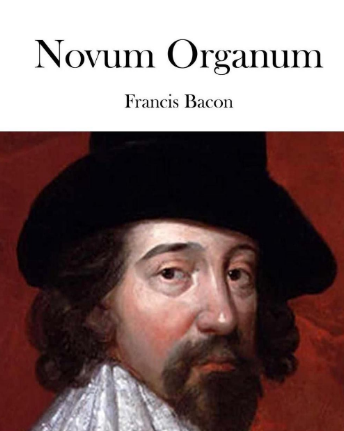
  </div>
  <div class="right" style="flex: 50%;">
      <ul>
          <li>Novum Organum (1620) - <a href="https://www.gutenberg.org/files/45988/45988-h/45988-h.htm">https://www.gutenberg.org/files/45988/45988-h/45988-h.htm</a></li>
          <li>Debuggen van mensen</li>
          <li>1970- : Wetenschappers + Computers = 💕</li>
      </ul>
  </div>
</div>

# Waarom Python?


* Populaire taal voor algemeen gebruik met **dynamisch typesysteem**
* Traag voor zware berekeningen, maar kan 'number-crunchen' in **modules gelinkt met code geschreven in C** (zoals numpy), of andere talen: C++, Rust, etc.
* **Numpy** module laat toe om **gevectoriseerde berekeningen** *makkelijk* uit te voeren

Meer info: https://scipy-lectures.org/intro/intro.html#why-python

# Waarom Numpy?

Voorbeeld:
$$f(x) = \sin^2(x) + 2$$

In [125]:
import numpy as np
import math

In [126]:
print("Standaard `math` module:")
%timeit [math.sin(x)**2 + 2 for x in range(10_000)]

print("\nMet `numpy` module:")
%timeit x = np.arange(0, 1, 10_000) ; np.sin(x)**2 + 2

print("\nWaw!")

Standaard `math` module:
1.04 ms ± 7.74 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Met `numpy` module:
1.57 μs ± 46.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Waw!


# Slicing in Numpy

<br>
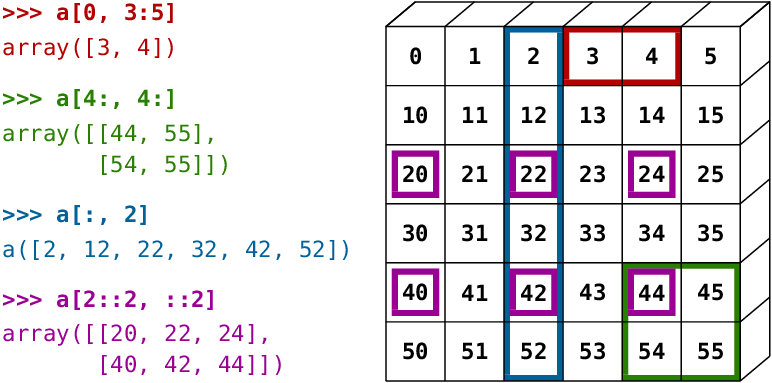

# Mindset bij het programmeren: structuur

<br>
<div style="text-align: center">
    <span style="border: 1px solid black; padding: 6pt;">
        Om het process te verduidelijken, voeg een niveau van abstractie toe.
    </span>
    <br>
    <span style="text-align:center; font-size: 18pt">⥮</span>
    <br>
    <span style="border: 1px solid black; padding: 6pt;">
        Voor snelheid bij het uitvoeren, verwijder een niveau van abstractie.
    </span>
</div>
<br>

Wat moet je kiezen?

# Kies abstractie over snelheid

* Beter algoritme $\rightarrow$ 4x sneller
* Keuze programmeertaal $\rightarrow$ 6x sneller
* Paar jaar wachten op betere hardware $\rightarrow$ 100x sneller

# Voorbeeld: Waterstofspectrum

*Het waterstofspectrum is de verzameling van golflengten $\lambda$ (kleuren) van licht dat een waterstofatoom kan uitzenden.*

De energieverschillen tussen de niveaus in het Bohrmodel worden gegeven door de Rydbergformule <br>[Bohr, N: *Rydberg's discovery of the spectral laws* North-Holland Publ., Amsterdam, 1985]

$$\frac{1}{\lambda} = R \left( \frac{1}{n_1^2} - \frac{1}{n_2^2}\right)$$

met $n_1$ het beginenergieniveau, $n_2$ het uiteindelijke energieniveau en $R$ de Rydbergconstante.

# Hoe het NIET moet

In [127]:
R = 1.097e-2
for m in range(1,4):
    print("m =",m)
    for n in range(m+1,m+6):
        invlambda = R*(1/m**2-1/n**2)
        print("  ",1/invlambda,"nm")

m = 1
   121.5436037678517 nm
   102.55241567912488 nm
   97.23488301428137 nm
   94.95594044363415 nm
   93.76220862091418 nm
m = 2
   656.3354603463993 nm
   486.1744150714068 nm
   434.084299170899 nm
   410.2096627164995 nm
   397.04243897498225 nm
m = 3
   1875.2441724182836 nm
   1281.9051959890612 nm
   1093.8924339106654 nm
   1005.013673655424 nm
   954.6697605038536 nm


# Vertaal de operaties die je doet in alleenstaande functies!

In [128]:
Rydberg = 1.097e-2

def line_series(n1, lines):
    """Reeks van spectraallijnen berekend met de Rydbergformule (in nm)
    
    Merk op: deze functie kun je nu apart runnen! Je zit niet meer vast in geneste for-loops.

    Argumenten:
        n1: Principal quantum number van het laagste energieniveau
        lines: Aantal lijnen te berekenen voor de reeks
    """
    return [1 / (Rydberg * (1/n1**2 - 1/n2**2)) \
            for n2 in range(n1 + 1, n1 + lines + 1)]

def hydrogen_spectrum(levels, lines):
    """Berekening van het waterstofspectrum
    
    Argumenten:
        levels: Aantal energie niveaus waarvoor de spectraallijnen worden berekend
        lines: Aantal lijnen te berekenen voor elke reeks
    """
    return {n1: line_series(n1, lines) \
            for n1 in range(1, levels + 1)}

hydrogen_spectrum(levels=3, lines=5)

{1: [121.5436037678517,
  102.55241567912488,
  97.23488301428137,
  94.95594044363415,
  93.76220862091418],
 2: [656.3354603463993,
  486.1744150714068,
  434.084299170899,
  410.2096627164995,
  397.04243897498225],
 3: [1875.2441724182836,
  1281.9051959890612,
  1093.8924339106654,
  1005.013673655424,
  954.6697605038536]}

In [129]:
def pretty_print(spectrum: dict):
    """Mooie weergaven van de berekende resultaten

    Args:
        spectrum: Berekende spectrum als `dict` datastructuur
    """
    for level, series in spectrum.items():
        print("n1 =", level)
        
        # Hier is het okay om geneste lussen te gebruiken omdat deze print functie niet essentieel is
        for line in series:
            print(f"    {line:.2f} nm")
            
pretty_print(hydrogen_spectrum(3, 5))

n1 = 1
    121.54 nm
    102.55 nm
    97.23 nm
    94.96 nm
    93.76 nm
n1 = 2
    656.34 nm
    486.17 nm
    434.08 nm
    410.21 nm
    397.04 nm
n1 = 3
    1875.24 nm
    1281.91 nm
    1093.89 nm
    1005.01 nm
    954.67 nm


# Tijd voor een opdracht! 🎉

Kijk na hoe je kan `slicen` in numpy. Probeer de volgende outputs te krijgen:

<br>
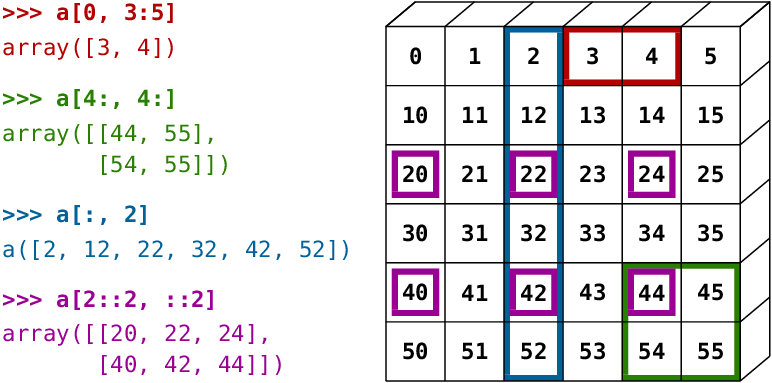

In [130]:
# Hier kan je zelf code invoeren

# Plotten voor dummies
<br>
<div >
    <img style="display: block; margin-left: auto; margin-right: auto; width: 70%;" src="https://files.realpython.com/media/Python_Plotting_With_Matplotlib_Watermark.610acdacc476.jpg">
</div>

# Plotten voor dummies: eenvoudige plot

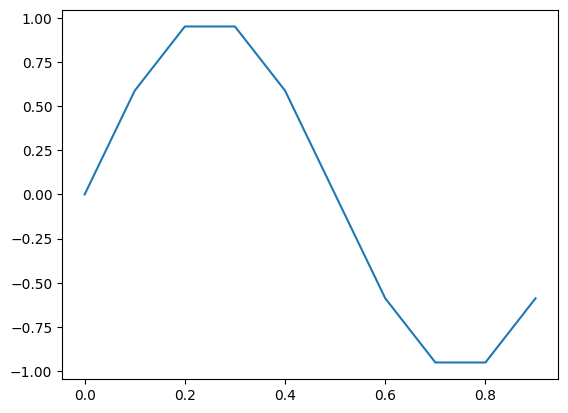

In [131]:
import matplotlib.pyplot as plt

pi = np.pi

t = np.arange(start=0.0, stop=1, step=0.1)

plt.plot(t, np.sin(2 * pi * t))
plt.show()

# Opmaak in orde brengen

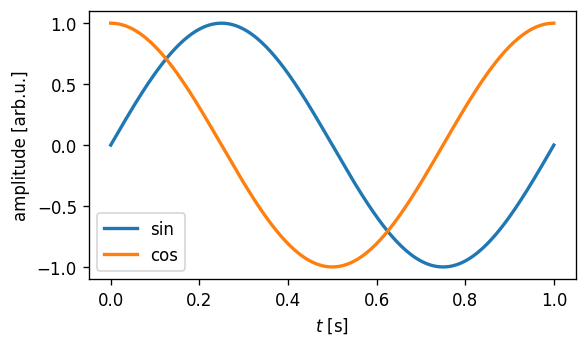

In [132]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
t = np.linspace(start=0.0, stop=1.0, num=300)

ax.plot(t, np.sin(2 * np.pi * t), label='sin', linewidth=2)
ax.plot(t, np.cos(2 * np.pi * t), label='cos', linewidth=2)

ax.set_ylabel("amplitude [arb.u.]")
ax.set_xlabel("$t$ [s]")  # Je kunt LaTeX gebruiken om assen te benoemen!
ax.legend()

# Wat matplotlib magie...
plt.tight_layout()

# Opslaan?
# fig.savefig('sinusoïde.png')
plt.show()

# Voorbeeld: Laden van een condensator via een weerstand

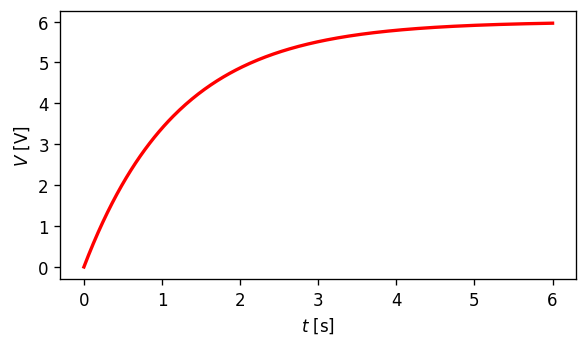

In [133]:
# Type-hinting is niet verplicht! Lees meer op: https://realpython.com/lessons/playing-python-types/
def opladen(t: np.array, Vb: float, tau: float) -> np.array:
    """Spanningsverloop over de condensator in functie van de tijd
    
    Args:
        t: tijdsverloop
        Vb: bronspanning
        tau: tijdsconstante
    """
    return Vb * (1 - np.exp(-t / tau))

def plot(ax, t, V):
    """Plotten van spanningsverloop"""
    ax.plot(t, V, color = 'r', linewidth=2)
    ax.set_ylabel("$V$ [V]")
    ax.set_xlabel("$t$ [s]")
    
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
t = np.linspace(start=0.0, stop=6.0, num=300)
plot(ax, t, opladen(t, Vb=6.0, tau=1.2))
plt.tight_layout() ; plt.show()

# Voorbeeld: analyse van een tweedegraadsvergelijking

In [134]:
from scipy.optimize import minimize, fsolve

def quadratic(x, a, b, c):
    """Tweedegraadsvergelijking van de vorm ax^2 + bx + c"""
    return a * x**2 + b * x + c

# je kunt zelf makkelijk nagaan dat het minimum x = 1/6 is
mini = minimize(lambda x: quadratic(x, a=3, b=-1, c=-5), 0)

# Wat zijn de nulpunten?
nulpunten = fsolve(lambda x: quadratic(x, a=3, b=-1, c=-5), [-10, 10])
print("Minimum: ", mini["x"])
print("Nulpunten: ", nulpunten)

Minimum:  [0.16666666]
Nulpunten:  [-1.13504161  1.46837495]


# Tijd voor een opdracht! 🎉

Plot hieronder de analyse van de tweedegraadsvergelijking, d.w.z. een figuur met een grafische voorstelling van alle berekende elementen.

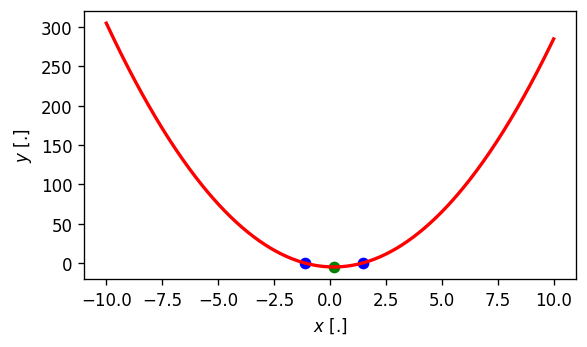

In [135]:
def plot(ax, x, y):
    ax.plot(x, y, color = 'r', linewidth=2)
    for nulpunt in nulpunten:
        ax.scatter(nulpunt, 0, color='b')
    ax.scatter(mini["x"], quadratic(mini["x"], a=3, b=-1, c=-5), color='g')
    ax.set_ylabel("$y$ [.]")
    ax.set_xlabel("$x$ [.]")
    
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
x = np.linspace(start=-10.0, stop=10.0, num=400)
y = quadratic(x, a=3, b=-1, c=-5)

plot(ax, x, y)
plt.tight_layout() ; plt.show()

# Tijd voor een opdracht! 🎉

- Maak een plot van $f(\theta) = \tan^{-1}\left[ \tan \left(\theta \right)\right]$. Gebruikt $\theta$  van $-\pi$ tot $\pi$. De meest eenvoudige boogtangens functie die numpy kent, is `arctan`. Klopt het resultaat met de verwachting?
- Zoek nu op hoe je de `arctan2` functie (de vier-kwadrant-inverse-tangens) kunt gebruiken.

Zorg uiteindelijk voor een plot van $f(\theta)$ met de verschillende boogtangensfuncties op dezelfde figuur. Verzorg de opmaak!

*spoiler alert: bij een volgend practicum kunnen deze boogtangensfuncties van pas komen...*

In [136]:
# Hier kan je zelf code invoeren

# Voorbereiding op huiswerk - fitalgoritme

We gaan gebruik maken van data, die voortgekomen is uit het practicum 'Netwerken en de wetten van Kirchhoff', namelijk de gemeten gesloten klemspanning $V_K$ [V] bij een stroom $I$ [mA], over een bron $V_1$ met open klemspanning $V_0$. In het practicum hebben we de interne weerstand $R_i$ [$\Omega$] van de bron bepaald als:

$$R_i = \frac{V_o - V_k}{I}. $$

Als voorbeeld gaan we dit nu doen d.m.v. een lineaire fit  door $V_k(I)$ ('load curve of a battery'):

$$V_k = -R_i \cdot I + V_o. $$

Eerst en vooral kijken we eerst naar hoe de data eruitziet:

In [137]:
# De data is in csv formaat gegeven. De extensie `.dat` kun je ook openen met je favoriete text editor.
# Opmerking 1: numpy ziet lijnen met een `#` symbool als comments en zal deze overslaan! (handig)
# Opmerking 2: numpy leest de data in als een **row-first** 2d matrix -> transponeren om column-first te lezen (.T)
data = np.loadtxt("kirchhoff_demo.dat", delimiter=",").T

# Maak gebruik van de header beschrijving in `kirchhoff_demo.dat` om te weten wat elke kolom voorstelt
I, dI = data[0], data[1]
V, dV = data[2], data[3]

In [138]:
def model(x, a, b):
    """Lineair model"""
    return a * x + b

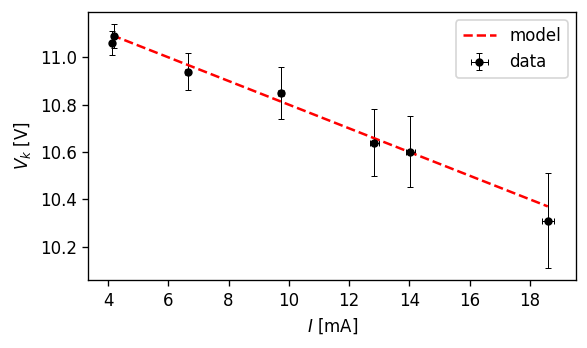

In [139]:
_, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))

# We genereren een linspace om het model te plotten
x = np.linspace(np.min(I*1e3), np.max(I*1e3), 100)

# We schalen ook de stroom voor een beter leesbare x-as
ax.errorbar(I*1e3, V, xerr=dI*1e3, yerr=dV, label="data",

        # De errorbars wat mooier maken :)
        marker="o", markersize=4, fmt=" ", color="black", ecolor="black", capsize=2, capthick=0.6, linewidth=0.6)

ax.plot(x, model(x, -0.05, 11.3), 'r--', label="model")

ax.set_ylabel("$V_{k}$ [V]")
ax.set_xlabel("$I$ [mA]")
ax.legend()
    
plt.tight_layout() ; plt.show()

Voor interactiviteit kun je bijvoorbeeld de `holoviews` library gebruiken. (installer met `pip install holoviews`) Let op als je jupyter LAB gebruikt! Je moet dan extra componenten activeren via de terminal/command prompt:
    
    jupyter labextension install @pyviz/jupyterlab_pyviz

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
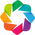

In [140]:
import holoviews as hv
hv.extension('bokeh')

In [141]:
def model_curve(a, b):
    """Speciale functie die geupdated kan worden met sliders."""
    return hv.Curve([(x_i, model(x_i, -a, b)) for x_i in x]).opts(color='red', line_dash='dashed')

dmap = hv.DynamicMap(model_curve, kdims=['a', 'b']) \
    .redim.values(a=np.arange(0., 0.1, 0.01), b=np.arange(11, 12, 0.1))

dmap * \
    hv.Scatter([(x, y) for x, y in zip(I*1e3, V)]) \
        .options(xlabel="I [mA]", ylabel="V [V]", xlim=(3.5, 19), size=6, width=500, height=350, color="black") * \
    hv.ErrorBars([(x, y, dy) for x, y, dy in zip(I*1e3, V, dV)]) * \
    hv.ErrorBars([(x, y, dx) for x, y, dx in zip(I*1e3, V, dI*1e3)], horizontal=True)

ModuleNotFoundError: No module named 'jupyter_bokeh'

:DynamicMap   [a,b]

# Tijd voor een opdracht! 🎉 - fitalgoritme

Bewijs nu je fit goed is aan de hand van de theorie. We kijken hiervoor naar de maximum likelihood. *We overlopen klassikaal de theorie.*

Voor het fitten van het model aan de data stellen we de nulhypothese $H_0$ op: de teststatistiek voldoet aan de $\chi^2_\nu$ distributie met $\nu=N-p$ aantal vrijheidsgraden ($N$ is het aantal datapunten en $p$ het aantal parameters). Je kiest een significantieniveau $\alpha=1\%$ of $5\%$ typisch. Vervolgens vergelijk je de teststatistiek met de kritische waarde van de $\chi^2_\nu$-distributie en het geselecteerde betrouwbaarheidsniveau (meestal eenzijdig rechts).

De uiteindelijke 'goodness-of-fit' evaluatie gebeurt aan de hand van 2 waarden:

1. p-waarde $P(\chi^2_\nu > \chi^2(\theta))$ (kun je berekenen met `chi2.sf(x, df=nu)` of `1-chi2.cdf(x, df=nu)`)
    - $>\alpha\Rightarrow$ $H_0$ niet verwerpen
    - $<\alpha\Rightarrow$ $H_0$ verwerpen op significantieniveau $\alpha$
2. de gereduceerde $\chi^2_{red}$-waarde, $\chi^2_{red}=\frac{\chi^2}{N-p}$ (Vraag je ook af: wat betekent het als $\chi^2_{red} < 1$, $\chi^2_{red} > 1$ en $\chi^2_{red} \approx 1$?)

In [142]:
from scipy.stats import chi2
chi2.ppf(0.68, df=2)

np.float64(2.27886856637673)

<br>
<div >
    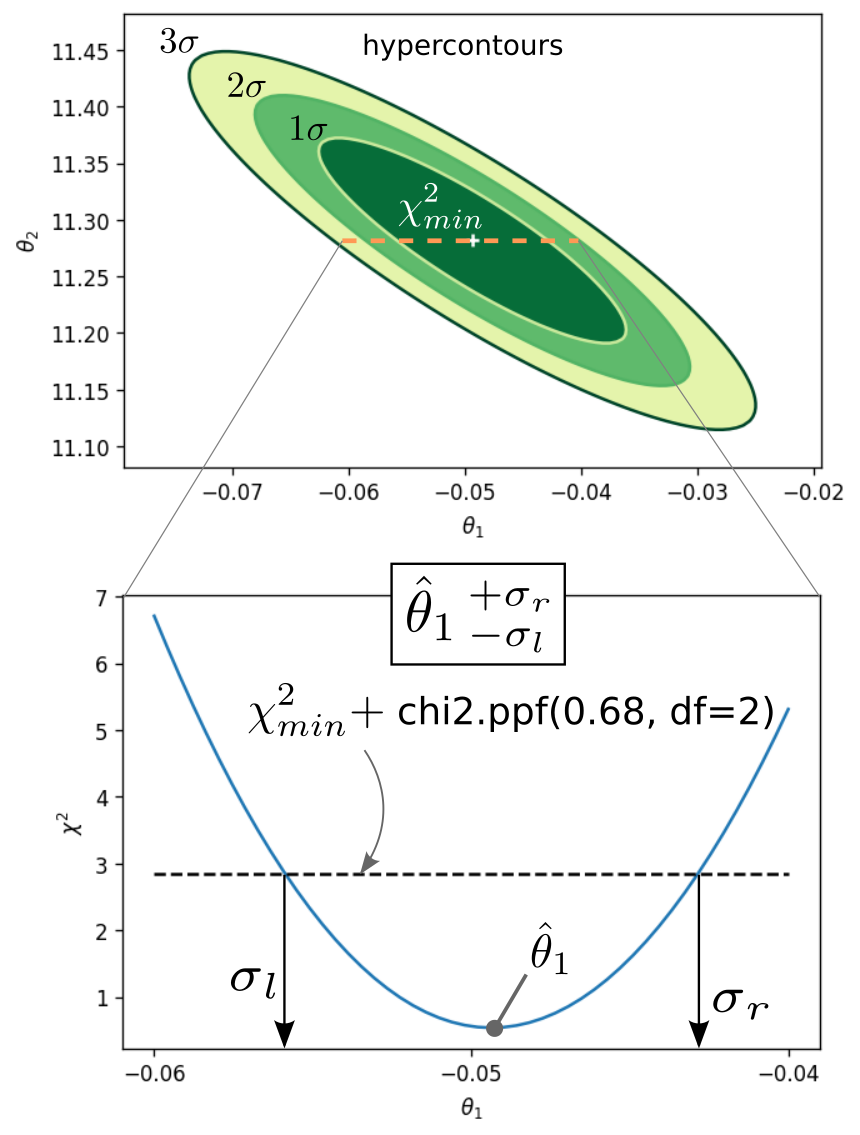
</div>

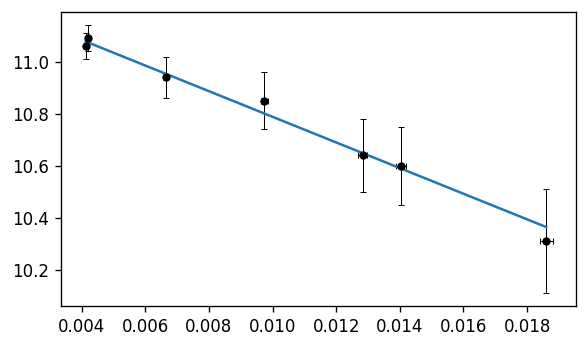

Optimized a: -49.359166888083294
Optimized b: 11.281709108810588
Chi2: 0.5390896514948088


In [104]:
import numpy as np
from scipy.optimize import minimize


data = np.loadtxt("kirchhoff_demo.dat", delimiter=",").T
I, dI = data[0], data[1]
V, dV = data[2], data[3]


def model(x, a, b):
    """Lineair model"""
    return a * x + b

def plot(x, y, dx, dy, model_x, model_y):
    _, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
    ax.errorbar(x, y, xerr=dx, yerr=dy, label="data",
            marker="o", markersize=4, fmt=" ", color="black", ecolor="black", capsize=2, capthick=0.6, linewidth=0.6)
    plt.plot(model_x, model_y)
    plt.tight_layout() ; plt.show()


def chi2(param, x, y, dy):
    X_sq = np.sum((y - model(x, *param))**2/(dy**2))
    return X_sq

initial_guess = (-0.05, 11.3)
optimised = minimize(chi2, initial_guess, args=(I, V, dV))
a_opt, b_opt = optimised.x

model_x = np.linspace(np.min(I), np.max(I), 100)
model_y = model(model_x, a_opt, b_opt)

plot(I, V, dI, dV, model_x, model_y)
print(f"Optimized a: {a_opt}")
print(f"Optimized b: {b_opt}")
print(f"Chi2: {chi2((a_opt, b_opt), I, V, dV)}")

#def uncertainty_interval(...?):

Optimized a: -750.0094636190212
Optimized b: -35.259999774018894
Optimized c: 11.232750778847562


Laatste tip: voor inspiratie kan je kijken naar de documentatie van `emcee`: https://emcee.readthedocs.io/en/stable/tutorials/line/

Daar wordt de MCMC methode besproken in plaats van de LS methode, maar het gebruik van scipy modules wordt daar wel goed uitgelegd.